In [352]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')


## Electric Vehicle Project

In my second project, I wanted to evaluate the Electric Vehicle industry. I planned to visualize strengths and weaknesses in current Electric Vehicle Makes and Model's perforamnces and popularity. This data set was retrieved from Data.gov containing 17 Columns and over 118,000 rows. I cleaned and visualized different plots in this project along with more detailed information based on new learnings! 

*(I did plan to use the State Column but after learning over 100K of vehicles were from WA and less than 100 from each other State I chose not to use the information. As of December 2022, there are slightly more than 500K EV's on the road in the USA so I believe the Data is still great for exploring)*


### Loading and Understanding the Data
* Dataframe shape
* Data Types
* Head & Tail
* Dataframe Summary

In [75]:
#Load Data Set
df = pd.read_csv(r"C:\Users\gregm\Downloads\Electric_Vehicle_Population_Data.csv")

In [76]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA8J,San Diego,Oceanside,CA,92051.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,153998050,NaN,NaN,6.073019e+09
1,3FA6P0PU7H,Sedgwick,Derby,KS,67037.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,NaN,138214331,POINT (-97.27013 37.54531),NaN,2.017301e+10
2,1N4AZ0CP8D,Snohomish,Marysville,WA,98271.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,3129059,POINT (-122.19388 48.15353),PUGET SOUND ENERGY INC,5.306105e+10
3,WBY8P8C58K,Kitsap,Bremerton,WA,98337.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126,0,26.0,166525635,POINT (-122.62749 47.565),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EA7K,Snohomish,Edmonds,WA,98026.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,32.0,475248315,POINT (-122.31768 47.87166),PUGET SOUND ENERGY INC,5.306105e+10


In [77]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
118954,5YJ3E1EB7N,Snohomish,Edmonds,WA,98020.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,187322495,POINT (-122.37689 47.81116),PUGET SOUND ENERGY INC,5.306105e+10
118955,1N4BZ0CP7H,King,Bellevue,WA,98004.0,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,0,48.0,349474394,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
118956,1N4AZ1CP8J,King,Redmond,WA,98052.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,45.0,292721068,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
118957,5YJXCAE41J,King,Seattle,WA,98109.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,144355970,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
118958,YV4BR0CLXM,Island,Camano Island,WA,98282.0,2021,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,10.0,149075293,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10


In [78]:
df.shape

(118959, 17)

In [79]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [80]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,118957.000000,118959.000000,118959.000000,118959.000000,118665.000000,1.189590e+05,1.189570e+05
mean,98158.358592,2019.225943,82.771266,1677.729176,29.780003,2.021988e+08,5.296823e+10
std,2608.853672,2.941749,101.136967,10419.858888,14.724894,9.063171e+07,1.686501e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.513196e+08,5.303301e+10
50%,98119.000000,2020.000000,26.000000,0.000000,34.000000,1.953611e+08,5.303303e+10
75%,98370.000000,2022.000000,204.000000,0.000000,43.000000,2.241380e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


### Prepping the Data
* Dropping irrelevant columns and rows
* Identifying duplicated rows
* Renaming Columns
* Feature Creation

In [81]:
# Using Vehicle ID as a unique identifier to locate any duplicates
df['DOL Vehicle ID'].duplicated().sum()

0

In [82]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [83]:
# Removing unecessary columns
df = df[['Make','Model','Model Year','Electric Range','Electric Vehicle Type','State','City']]

In [85]:
# Inspected Null Values in Data
df.isna().sum()

Make                       0
Model                    133
Model Year                 0
Electric Range             0
Electric Vehicle Type      0
State                      0
City                       2
dtype: int64

In [86]:
# Less than 1% NA
df['Model'].isna().sum() / len(df) * 100

0.11180322632167385

In [87]:
# Creating a df for models with null values
missing_models = df[df['Model'].isna()]

In [88]:
# Using new df to find which Vehicle Makes are missing Model info
missing_makes = missing_models['Make'].unique()
print(missing_makes)

['VOLVO']


In [89]:
# Group the data by "Make" and "Model", and count the number of occurrences of each Model
Model_Counts = df.groupby(['Make', 'Model']).size().reset_index(name='Count')

In [90]:
# Sort the data by "Make" and "Count" in descending order
popularity_sorted = Model_Counts.sort_values(['Make', 'Count'], ascending=[True, False])

In [91]:
# Keep only the top Model for each Make
most_popular = popularity_sorted.groupby('Make').first().reset_index()
print(most_popular)

              Make                     Model  Count
0             AUDI                    E-TRON    838
1   AZURE DYNAMICS  TRANSIT CONNECT ELECTRIC      7
2          BENTLEY                  BENTAYGA      2
3              BMW                        I3   1894
4         CADILLAC                       ELR     75
5        CHEVROLET                   BOLT EV   4995
6         CHRYSLER                  PACIFICA   1884
7             FIAT                       500    810
8           FISKER                     KARMA     18
9             FORD            MUSTANG MACH-E   1984
10         GENESIS                      GV60     19
11           HONDA                   CLARITY    785
12         HYUNDAI                   IONIQ 5    783
13          JAGUAR                    I-PACE    215
14            JEEP                  WRANGLER   1334
15             KIA                      NIRO   2314
16      LAND ROVER         RANGE ROVER SPORT     22
17           LEXUS                        NX     40
18         L

In [92]:
# Filling in missing value most popular Volvo Model
df['Model'].fillna(value = 'XC90', inplace = True)

In [93]:
df.isna().sum()

Make                     0
Model                    0
Model Year               0
Electric Range           0
Electric Vehicle Type    0
State                    0
City                     2
dtype: int64

In [94]:
# Identifying Values with 0 in Column
df['Electric Range'].value_counts()

0      44989
215     6321
220     4111
84      4057
238     3430
       ...  
74         3
95         2
59         1
39         1
57         1
Name: Electric Range, Length: 101, dtype: int64

In [96]:
# Replacing 0 with NAN so we can fill na and get a proper median of electric range
df['Electric Range'].replace(0, np.nan, inplace = True)

In [97]:
df.isna().sum()

Make                         0
Model                        0
Model Year                   0
Electric Range           44989
Electric Vehicle Type        0
State                        0
City                         2
dtype: int64

In [98]:
# Group By Model
model_group = df.groupby('Model')

In [99]:
# Median electric range for each vehicle model
range_median = model_group['Electric Range'].median()

In [100]:
# Filling na's of electrice range to its class median
df['Electric Range'] = df['Electric Range'].fillna(df['Model'].map(range_median))

In [101]:
df.isna().sum()

Make                         0
Model                        0
Model Year                   0
Electric Range           10031
Electric Vehicle Type        0
State                        0
City                         2
dtype: int64

In [154]:
# Creating New Column
df['EV_Type'] = np.where(df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)','(BEV)','(PHEV)')

### Feature Understanding and Relationships
* Plotting Distributions(Histogram & KDE)
* Count Plots
* Groupby Comparisons

In [103]:
# Import textwrap
import textwrap

#Creating function to wrap text in future text axis labels
def wrap_labels(ax, width, break_long_words = False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width = width,
                                    break_long_words = break_long_words))
    ax.set_xticklabels(labels, rotation = 0)

Text(0.5, 0, 'Battery EV VS Plug-in Hybrid EV')

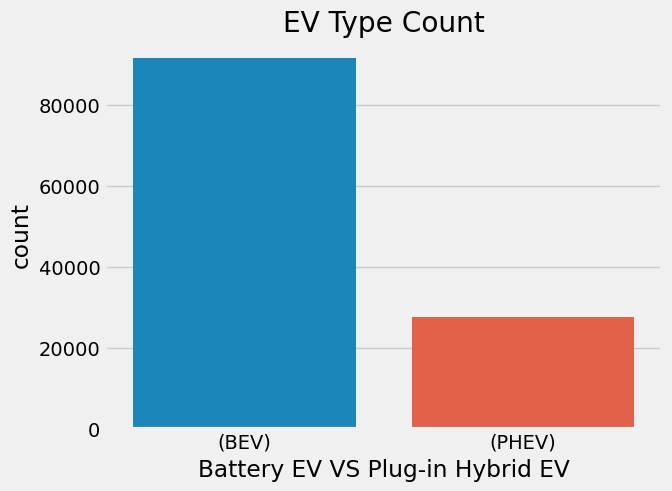

In [351]:
# Creating Countplot
sns.countplot(x = 'EV_Type', data = df)
plt.title('EV Type Count')
plt.xlabel('Battery EV VS Plug-in Hybrid EV')

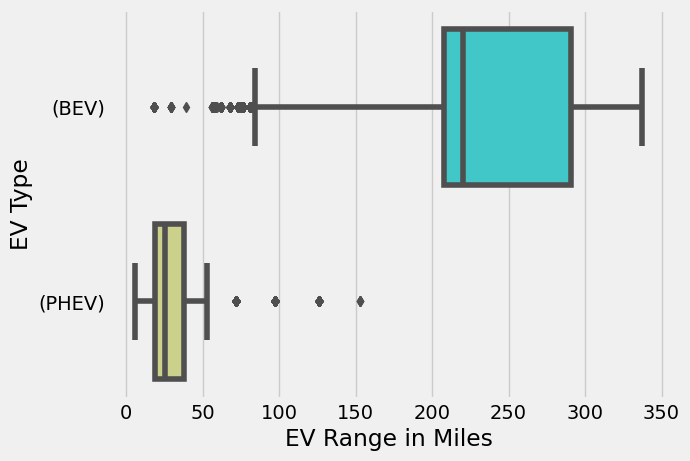

In [240]:
# Plotting boxplot to display distribution of Ev range based on EV type
ax = sns.boxplot(y = 'EV_Type', x = 'Electric Range', data = df, orient = 'h', palette = 'rainbow')
ax.set_ylabel('EV Type')
ax.set_xlabel('EV Range in Miles')
plt.show()

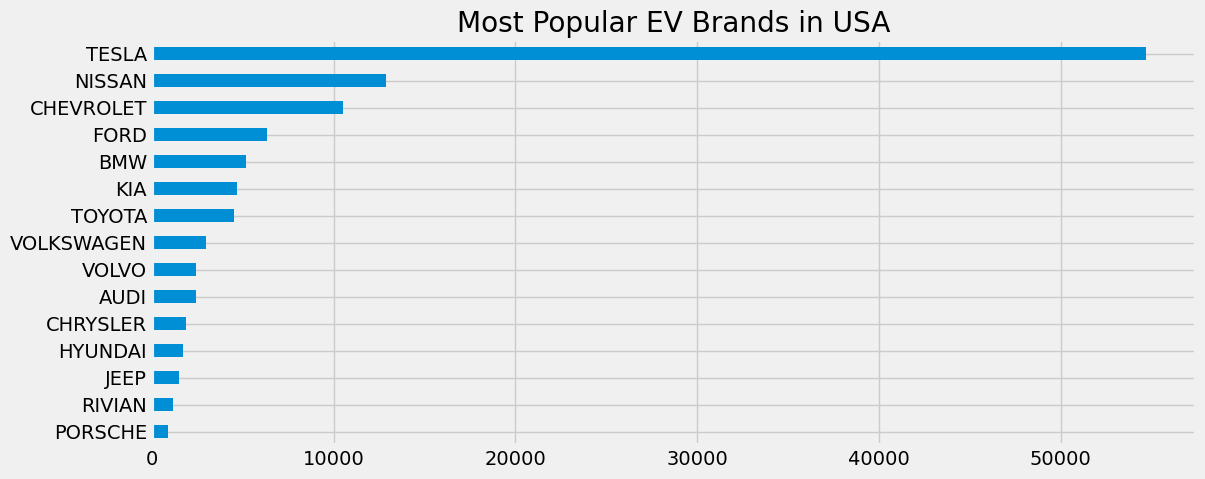

In [339]:
# Plot top 15 Makes counted in desc order
ax = df['Make'].value_counts().head(15).sort_values(ascending =True)  \
.plot(kind = 'barh', title = "Most Popular EV Brands in USA", figsize = (12,5))

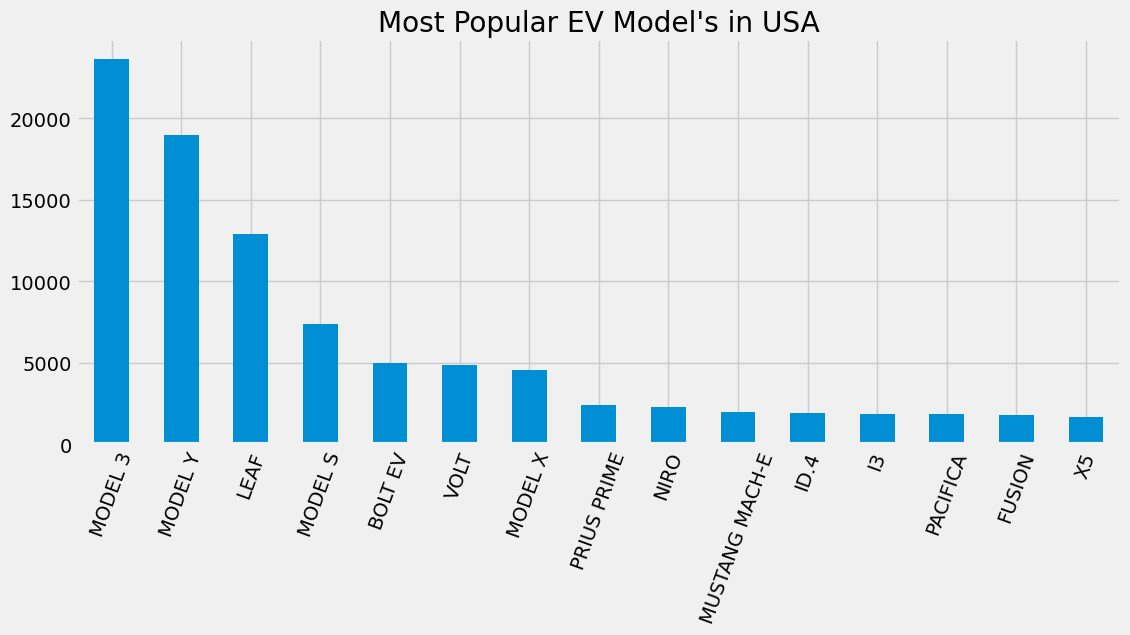

In [330]:
# Plot top 15 Models counted 
df['Model'].value_counts().head(15)  \
.plot(kind = 'bar', title = "Most Popular EV Model's in USA", figsize = (12,5))
plt.xticks(rotation = 70)
plt.show()

Text(0.5, 1.0, "Purchased EV's Since 2010 based on Year Model")

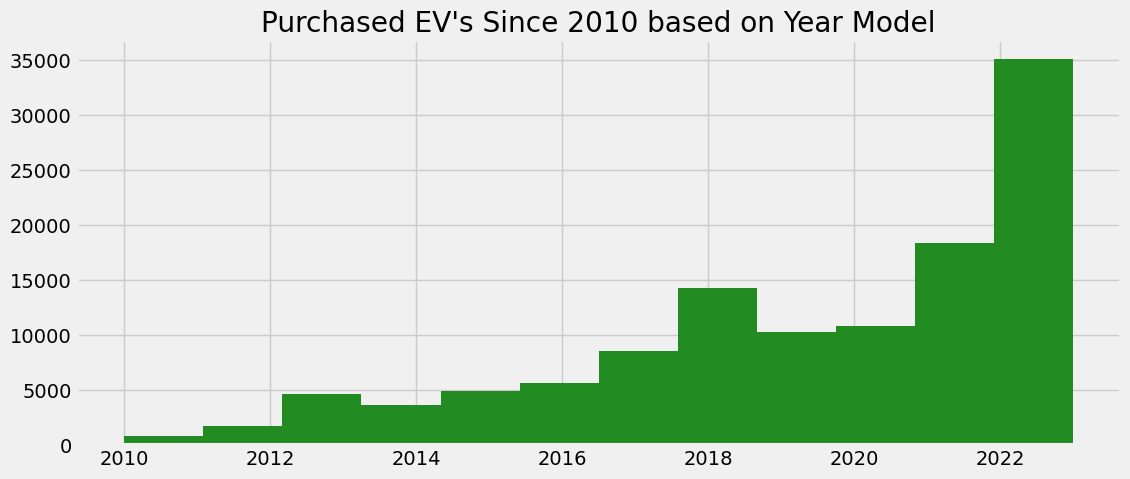

In [328]:
# Displot to view the increase of EV model's yearly
df['Model Year'].hist( bins = 12, color = 'forestgreen', range = [2010,2023], figsize = (12,5))
plt.title("Purchased EV's Since 2010 based on Year Model")

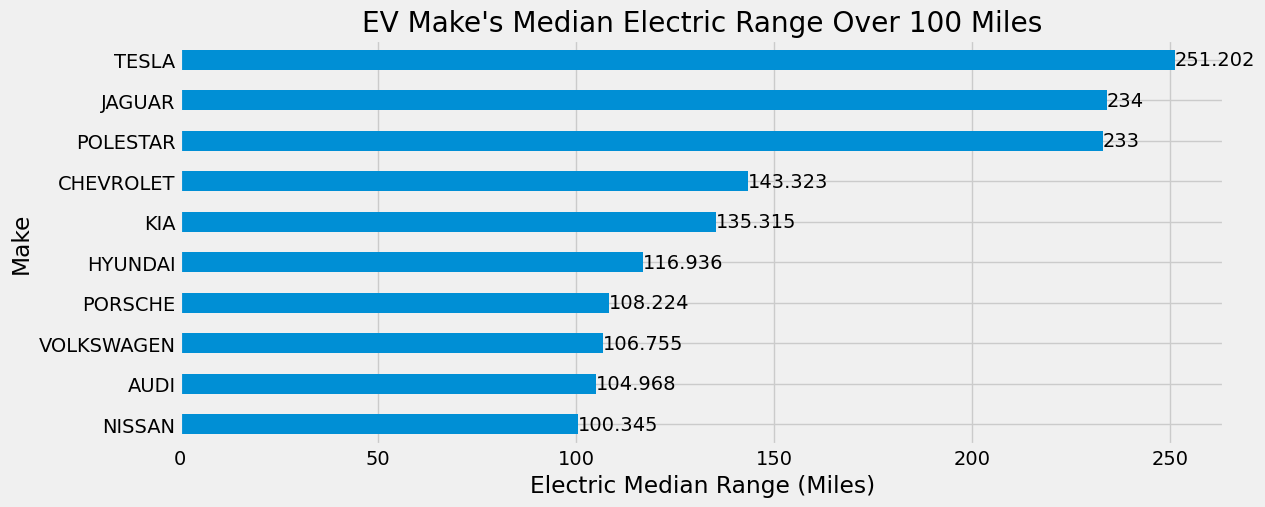

In [326]:
# Group By Make on Electric Range
# Aggregate Mean if Greater than 100
# Sort Values by mean in descending order
# Function to add labels for each bar

ax = df.groupby('Make')['Electric Range'] \
.agg(['mean'])  \
.query('mean > 100') \
.sort_values('mean')['mean'] \
.plot(kind = 'barh', figsize = (12,5),title = "EV Make's Median Electric Range Over 100 Miles")
ax.set_xlabel('Electric Median Range (Miles)')

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label=makes[i])

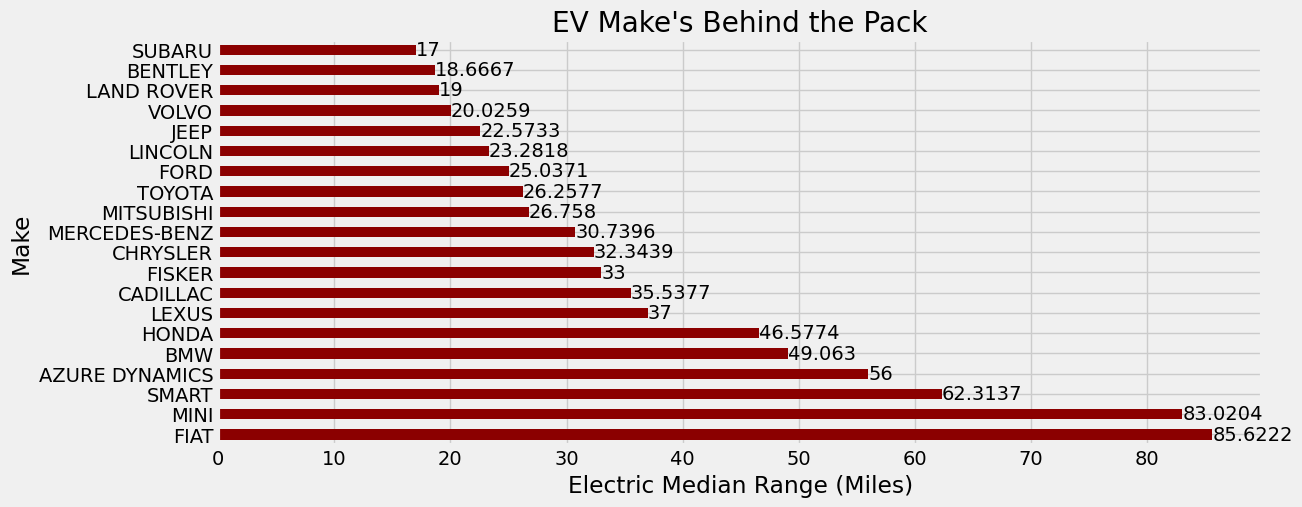

In [325]:
# Group By Make on Electric Range
# Aggregate Mean if less than 100
# Sort Values by mean in ascending order
# Function to add labels for each bar

ax = df.groupby('Make')['Electric Range'] \
.agg(['mean'])  \
.query('mean < 100') \
.sort_values('mean')['mean'] \
.sort_values(ascending = False) \
.plot(kind = 'barh', figsize = (12,5),title = "EV Make's Behind the Pack", color = 'darkred')
ax.set_xlabel('Electric Median Range (Miles)')

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label=makes[i])

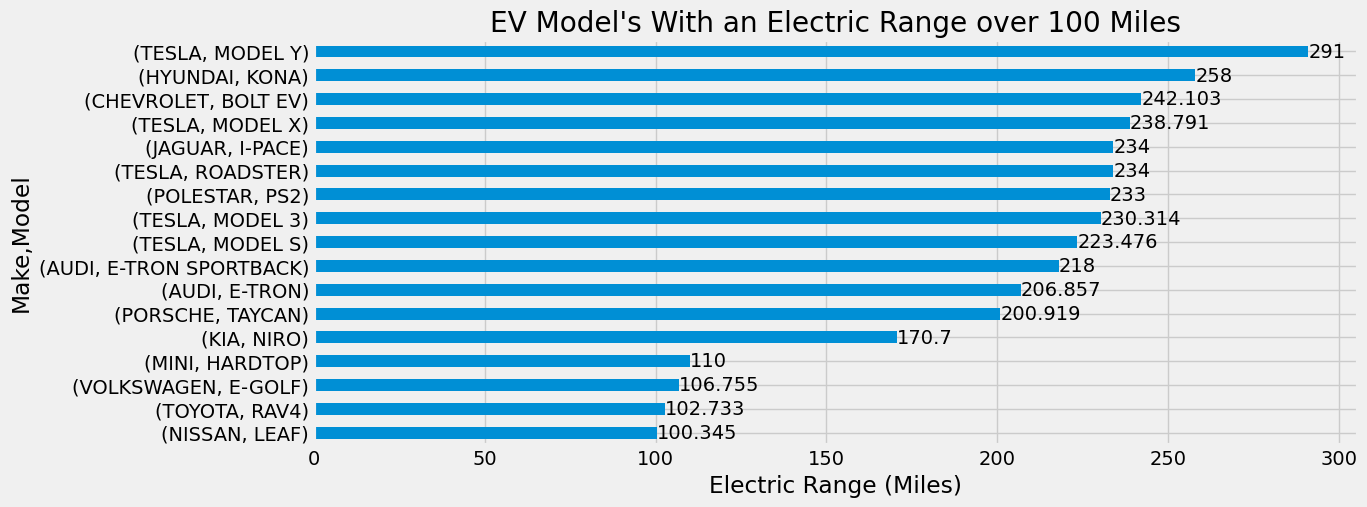

In [324]:
#Group By Make and Model on Electric Range
# Aggregate Mean if greater than 100
# Sort Values by mean in descending order
# Function to add labels for each bar

ax = df.groupby(['Make','Model'])['Electric Range'] \
.agg(['mean'])  \
.query('mean > 100') \
.sort_values('mean')['mean'] \
.plot(kind = 'barh', figsize = (12,5),title = "EV Model's With an Electric Range over 100 Miles")
ax.set_xlabel('Electric Range (Miles)')

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label=makes[i])

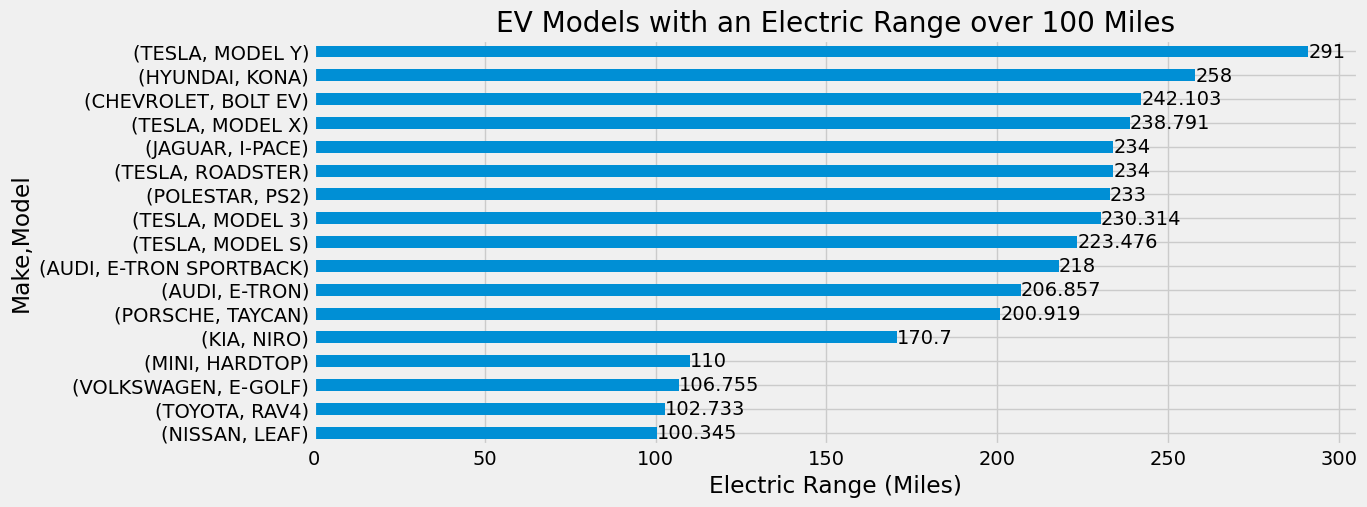

In [314]:
# group by make and model
# filter for models with electric range over 100 miles
# extract the make column as a separate variable
# functions to add labels for each bar

grouped = df.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending = True)
filtered = grouped[grouped > 100]
makes = filtered.index.get_level_values(0)
ax = filtered.plot(kind='barh', figsize=(12, 5), title="EV Models with an Electric Range over 100 Miles")
ax.set_xlabel('Electric Range (Miles)')


for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label=makes[i])